# Finding Heavy Traffic Indicators on I-94

Learn to analyze data using exploratory data visualization.

https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Dataset

In [32]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [33]:
print(df.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 2. Analyzing Traffic Volume

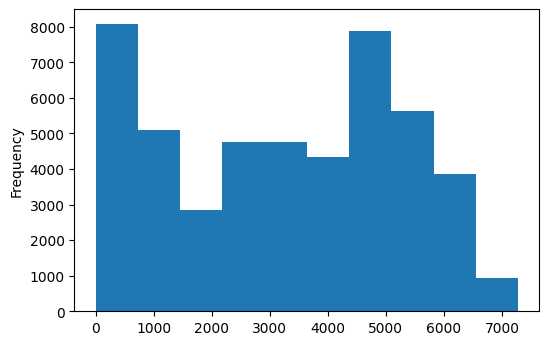

In [35]:
df['traffic_volume'].plot.hist()

In [36]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

## 3. Traffic Volume: Day vs. Night

In [37]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour

daytime = df[(df['hour'] >= 7) & (df['hour'] < 19)]
nighttime = df[(df['hour'] >= 19) | (df['hour'] < 7)]

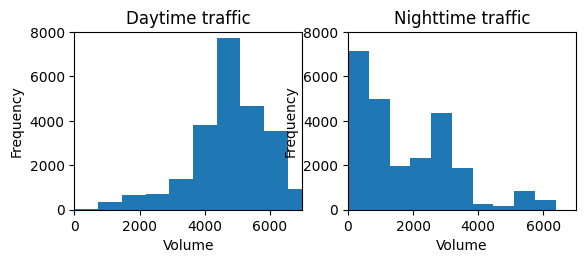

In [38]:
plt.figure(figsize=(10, 8))
plt.subplot(3,3,1)
plt.title('Daytime traffic')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.ylim(0, 8000)
daytime['traffic_volume'].plot.hist()

plt.subplot(3,3,2)
plt.title('Nighttime traffic')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.ylim(0, 8000)
nighttime['traffic_volume'].plot.hist()
plt.show()

In [39]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [40]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## 4. Time Indicators
Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

In [41]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-41-7d784f045492>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

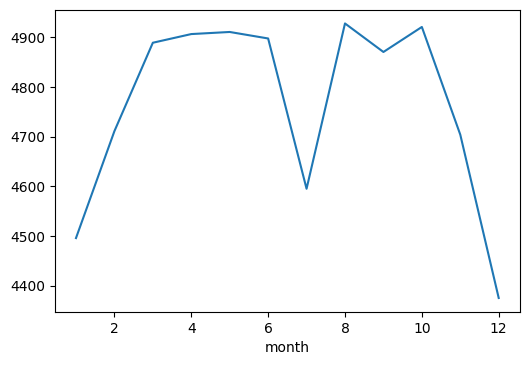

In [42]:
by_month['traffic_volume'].plot()
plt.show()

In the previous screen, we generated a line plot showing how the traffic volume changed each month on average.

We'll now continue with building line plots for another time unit: day of the week.

In [43]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-43-88ced10f3bb7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

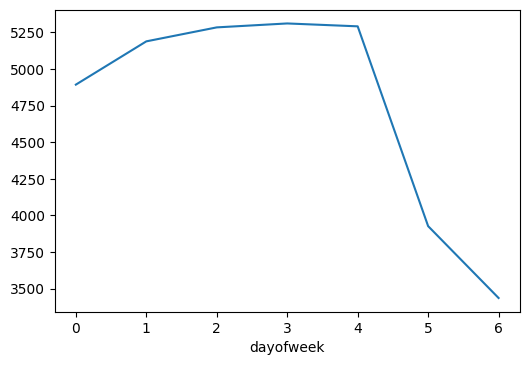

In [44]:
by_dayofweek['traffic_volume'].plot()
plt.show()

On the previous screen, we found that the traffic volume is significantly heavier on business days compared to the weekends.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [45]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-45-f8473ede9f01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



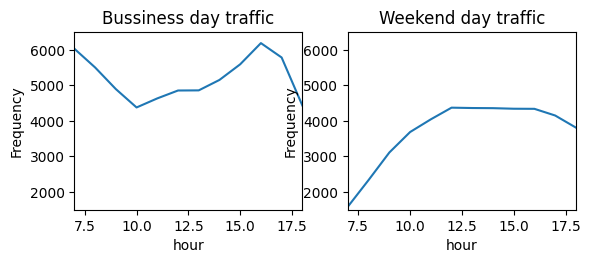

In [46]:
plt.figure(figsize=(10, 8))
plt.subplot(3,3,1)
plt.title('Bussiness day traffic')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.xlim(7, 18)
plt.ylim(1500, 6500)
by_hour_business['traffic_volume'].plot()

plt.subplot(3,3,2)
plt.title('Weekend day traffic')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.xlim(7, 18)
plt.ylim(1500, 6500)
by_hour_weekend['traffic_volume'].plot()
plt.show()

So far, we`ve focused on finding time indicators for heavy traffic, and we reached the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## 5. Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [47]:
# df['traffic_volume'].corr()
# df['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']
df[['temp','rain_1h','snow_1h','clouds_all','traffic_volume', 'weather_main']].corr()
# df['rain_1h']

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


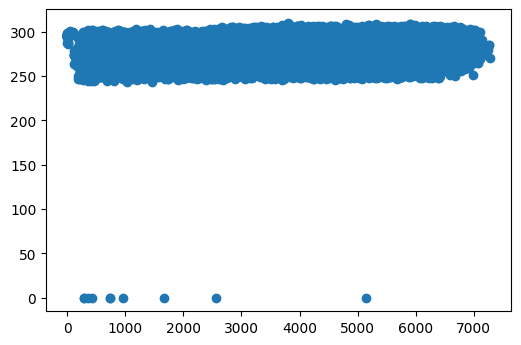

In [48]:
plt.scatter(df['traffic_volume'], df['temp'])
plt.show()

Previously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

## 9. Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [49]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

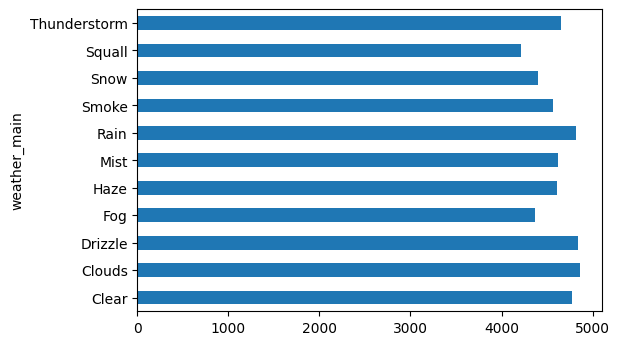

In [50]:
by_weather_main['traffic_volume'].plot.barh()

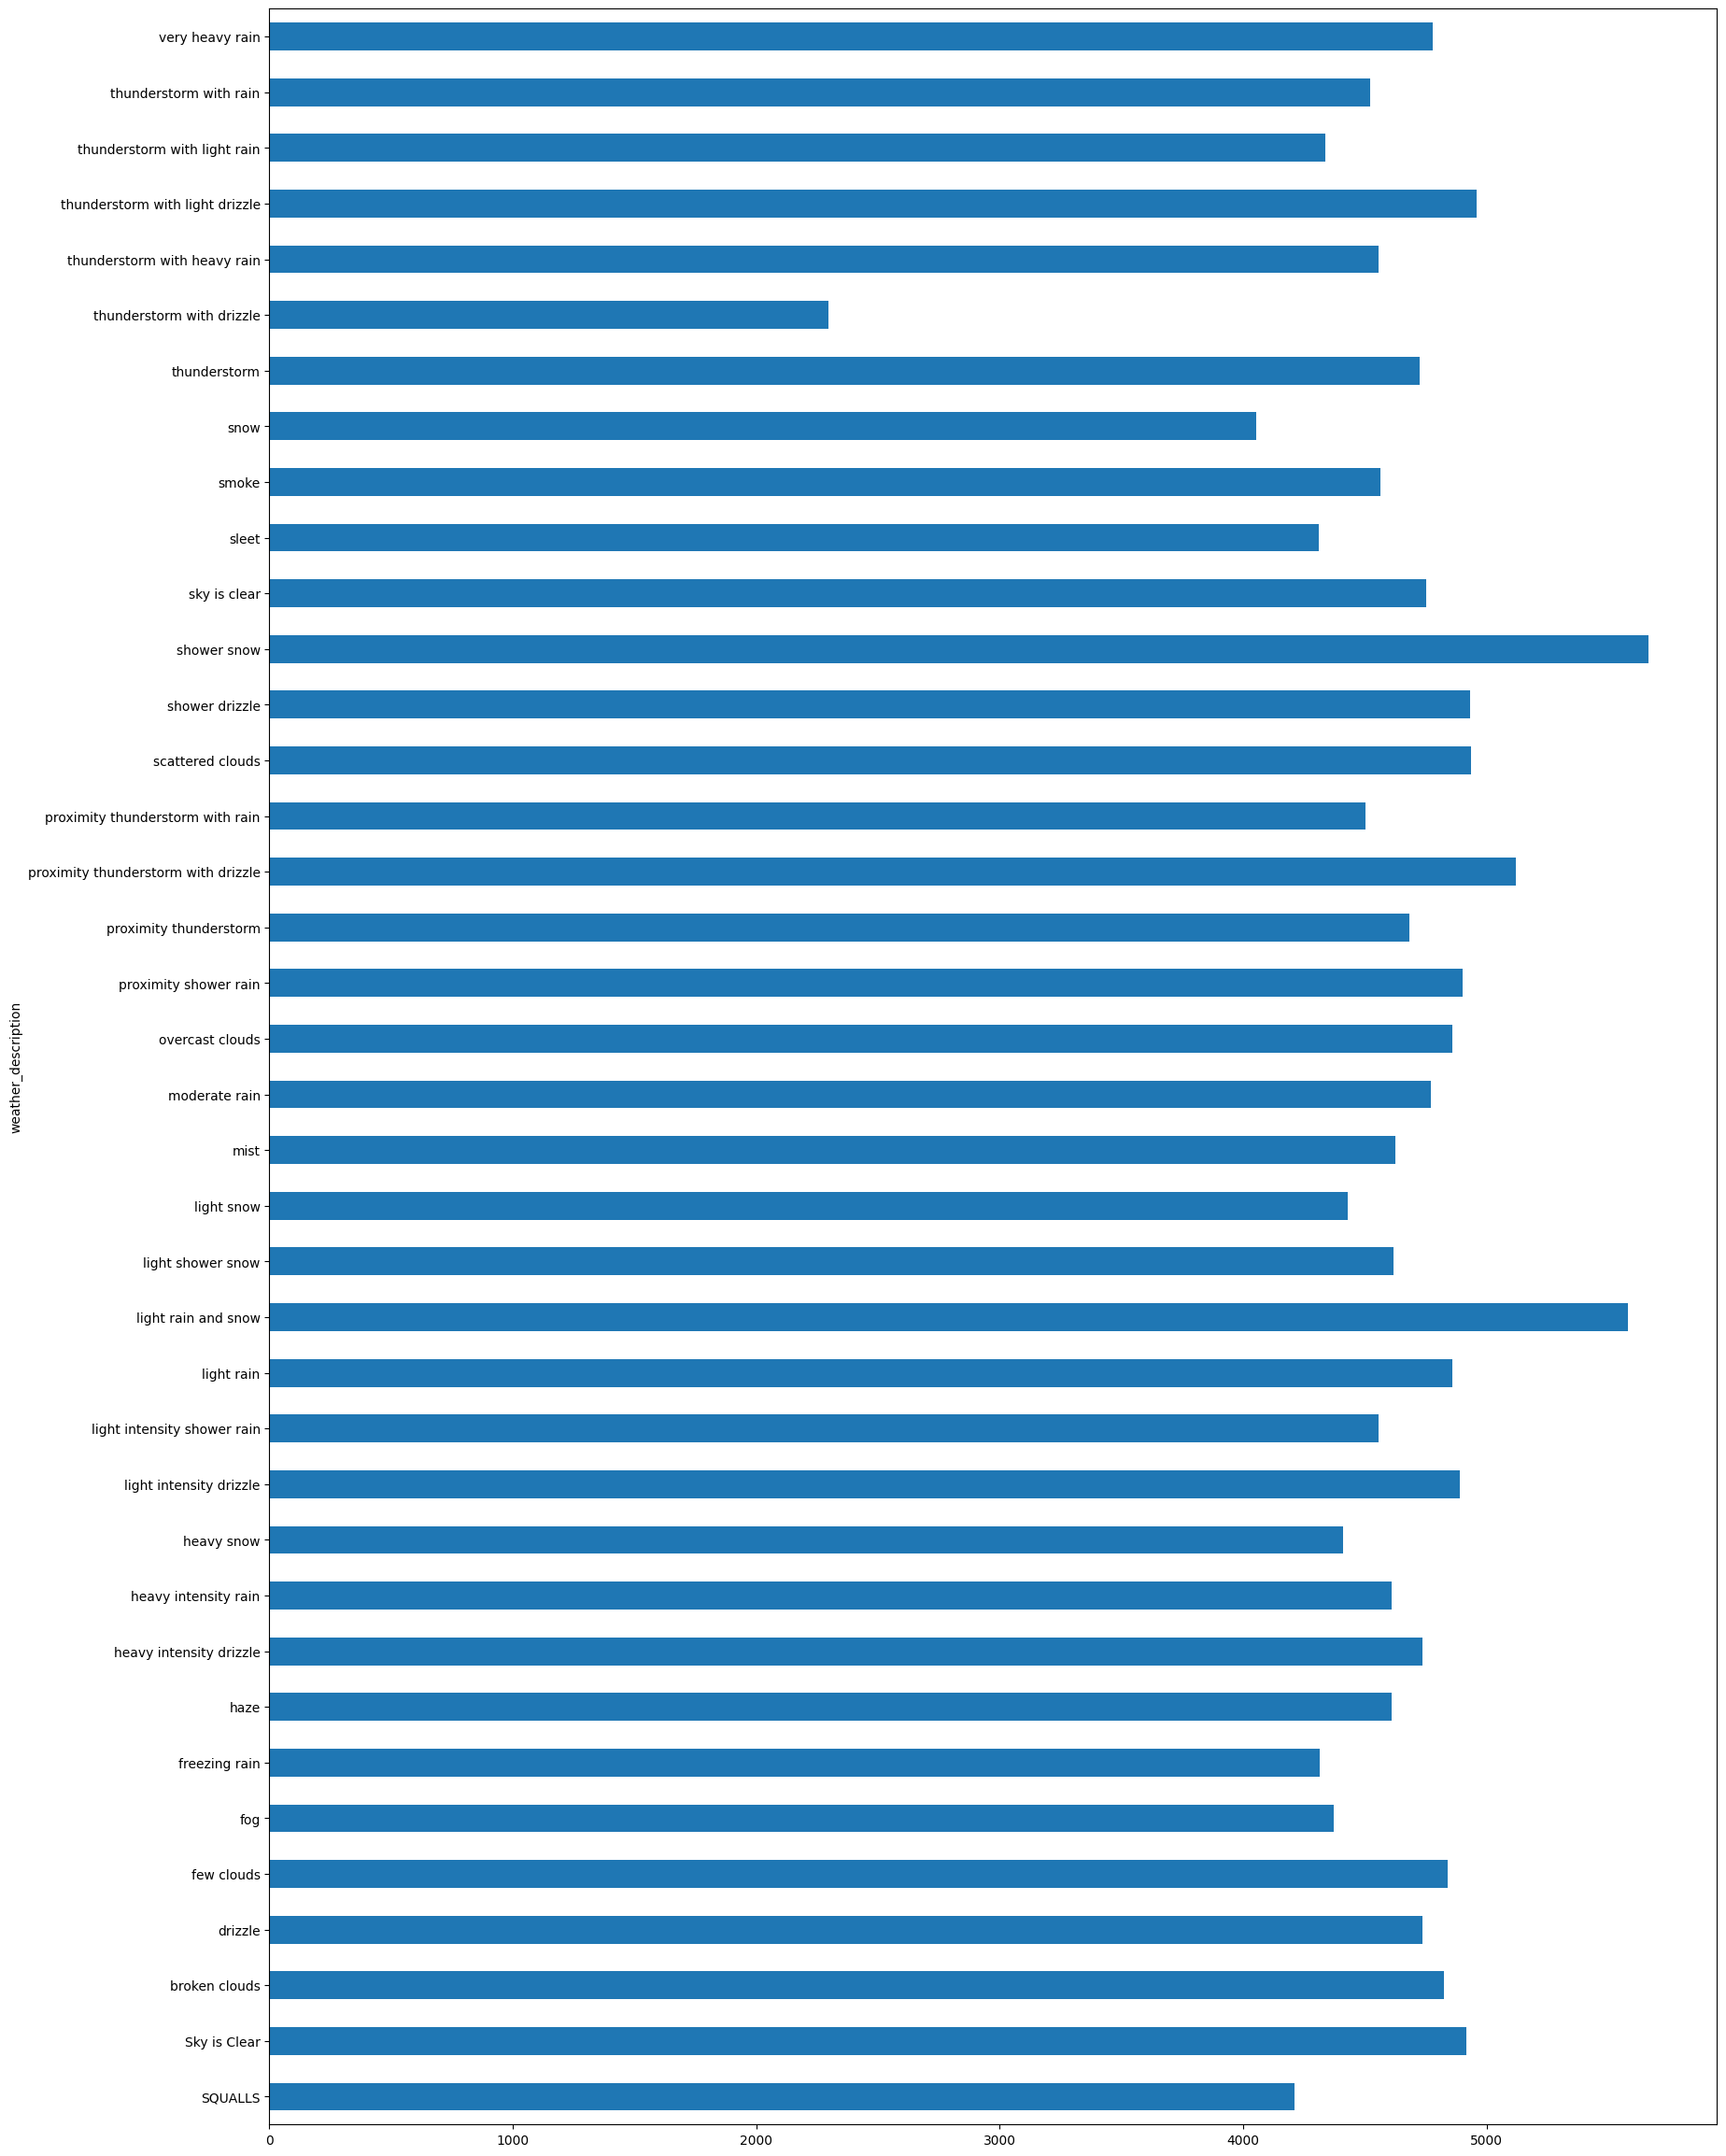

In [51]:
by_weather_description['traffic_volume'].plot.barh(figsize=(20,30))

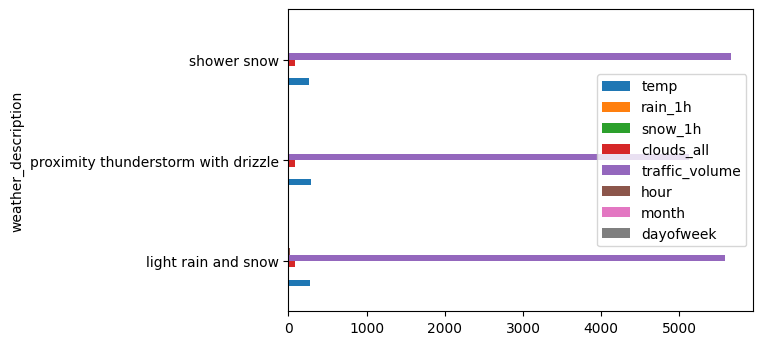

In [52]:
by_weather_description[by_weather_description['traffic_volume'] >= 5000].plot.barh()